# Variance reduction by control variates

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge)
  * [Modules](#Python-Modules)
* [Importance of Sampling](#Importance-of-Sampling)
* [Exercise - Monte Carlo Estimator](#Exercise---Monte-Carlo-Estimator)
  * [Exercise - Inverse Transform Sampling](#Exercise---Inverse-Transform-Sampling)
  * [Exercise - Empirical Variance](#Exercise---Empirical-Variance)
  * [Exercise - Variance Reduction by Control Variates](#Exercise---Variance-Reduction-by-Control-Variates)
* [Literature](#Literature)
* [Licenses](#Licenses)

## Introduction

This notebook shows the use of control variates to reduce the variance of the estimator.

In order to detect errors in your own code, execute the notebook cells containing `assert` or `assert_almost_equal`. These statements raise exceptions, as long as the calculated result is not yet correct.

## Requirements

### Knowledge

To complete this exercise notebook, you should possess knowledge about the following topics.
* Probability density function
* Probability mass function
* Expected value (**Exercise - Expected Value**)
* Monte Carlo estimator 
* Inverse transform sampling
* Variance reduction

The following material can help you to acquire this knowledge:
* Read Chapter 3 "Probability and Information Theory" of the [Deep Learning Book](http://www.deeplearningbook.org/)
* https://www.youtube.com/watch?v=irheiVXJRm8 (Smirnov Transform)
* https://www.math.nyu.edu/faculty/goodman/teaching/MonteCarlo2005/notes/VarianceReduction.pdf (Variance reduction)

### Python Modules

In [1]:
# External Modules
import matplotlib.pyplot as plt
import numpy as np
from numpy.testing import assert_almost_equal

%matplotlib inline

In [2]:
def plot_p_f_and_samples(x, p, f, samples_x1=[], samples_x2=[]):
    """ 
    Plots two functions p(x) and f(x) for given x values
    and f(samples_x) as single points
    
    :param x: x-values for the functions p and f
    :type x: 1D ndarray
    :param p: pdf
    :type p: lambda function
    :param f: function evaluated with x and samples_x
    :type f: lambda function
    :param samples x: x-values for the function f drawn as single points    
    """
    plt.plot(x, p(x), label='p(x)')
    plt.plot(x, f(x),label='f(x)')
    if len(samples_x1) > 0:
        plt.plot([samples_x1[:-1]], [f(samples_x1)[:-1]], marker='x', color='g')
        plt.plot([samples_x1[-1]], [f(samples_x1)[-1]], marker='x', color='g', label='f(samples_x1)')
    if len(samples_x2) > 0:
        plt.plot([samples_x2[:-1]], [f(samples_x2)[:-1]], marker='x', color='r')
        plt.plot([samples_x2[-1]], [f(samples_x2)[-1]], marker='x', color='r', label='f(samples_x2)')
    plt.xlabel('x')
    plt.legend(loc='upper left')

### Crude Monte Carlo Estimator (CMC)

We have a function, which estimates $\mathbb E_{x \sim p} [f(x)]$ with the use of $n$ drawn samples, with the given functions: 

$$
f(x)=\sin(x)
$$ 

and 
$$
p(x) = \text{uniform}(0, \pi/2)
$$



### Exercise - Variance Reduction by Control Variates

**Task:**

Determine the empirical variance (also sample variance) of the CMC-estimator for n = 10 by computing the expected value 10,000 times.

In [5]:
# Complete this cell
#(...)

#(...)
e_variance = None

In [7]:
# Executing this cell must not throw an Exception
# The solution is obfuscated so you can solve the exercise without unintendedly spoiling yourself

#obfuscated_solution = 2366.531932907348 * 626 / 72727
#assert_almost_equal(e_variance, obfuscated_solution, decimal=2)

The following plot visualizes how the estimation converges towards the true expected value as n increases.

0.6653261475951041


Text(0, 0.5, 'estimate')

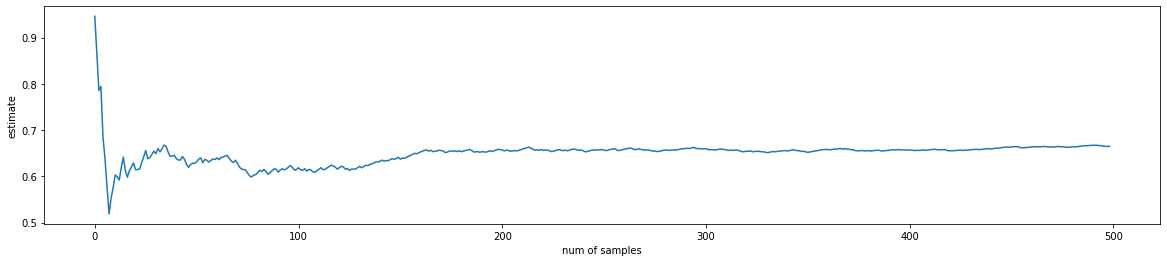

In [8]:
# PLOT

n=500
x_, fs = estimate_f_CMC(n=n)
x = np.arange(n-1)
e = np.ndarray(n-1)
for i in range(1,n):
    e[i-1] = fs[:i].mean()
    
print(fs.mean())

plt.figure(figsize=(20,4))
plt.plot(x,e)
#plt.axhline(y=2., c='g')
plt.xlabel("num of samples")
plt.ylabel("estimate")

### Variance Reduction by Control Variates



- $\hat F$ is crude MC-estimator of $\mathbb E_p [f(x)]$:
$$
\hat F = \frac{1}{n}\sum_i^n f(x^{(i)})
$$

If we have a variable $g(x)$, which fulfills the following

* $g(x)$ is correlated with $f(x)$
* its expected value $\gamma = \mathbb E[g(X)] $ is known


then we can construct an "improved" estimator $\bar F$ with less variance:

$$
\bar F = \hat F + \beta \cdot ( G - \gamma )
$$

with 
$$
G = \frac{1}{n}\sum_i^n g(x^{(i)})
$$

Note: $\bar F$ and $\hat F$ have the same bias. If $\bar F$ is unbiased then $\hat F$ is also unbiased.

The variance of the new estimator is:

$$
var(\bar F) = var(\hat F) + \beta^2 var(G) + 2 \beta \text{ } cov(\hat F, G)
$$

-----------------

A necessary condition of an extremum (minimum)of the variance of $var(\bar F)$ w.r.t. $\beta$ is:

$$
\begin{align}
0 &= \frac{\partial var(\bar F)}{\partial \beta} \\
  &= 2 \beta var(G) + 2 \text{ } cov(\hat F, G)
\end{align}
$$

Therefore, the optimal $\beta$ is

$$
\beta^* = - \frac{cov(\hat F,G)}{var(G)}
$$

Note, the extremum is a minimum because the second derivative is greater zero:

$$ \frac{\partial^2 var(\bar F)}{(\partial \beta)^2} = 2 var(G) > 0 $$


with the optimal $\beta^*$ the variance of the new estimator $\bar F$ is

$$
\begin{align}
var(\bar F) &= var(\hat F) + \beta^{*2} var(G) + 2 \beta^* \text{ } cov(\hat F, G)\\
& = var(\hat F) + \frac{(cov(\hat F,G))^2}{var(G)} - 2 \frac{(cov(\hat F,G))^2}{var(G)}\\
& = var(\hat F) -  \frac{(cov(\hat F,G))^2}{var(G)}\\
& = var(\hat F) -  \frac{(cov(\hat F,G))^2}{var(\hat F) var(G) } var(\hat F)\\
&= (1-\rho^2_{\hat F, G}) var(\hat F)
\end{align}
$$

with the correlation coefficient $\rho^2_{\hat F, G} = \frac{(cov(\hat F,G))^2}{var(\hat F) var(G) } $

$cov(\hat F,G)$ and $var(G)$ can be estimated with the MC samples $x^{(i)}$

from  https://en.wikipedia.org/wiki/Control_variates

When the expectation of the control variable, $\mathbb{E} \left[g(X)\right]=\gamma$, is not known analytically, it is still possible to increase the precision in estimating $\gamma$  (for a given fixed simulation budget), provided that the two conditions are met: 
1. evaluating $g(X)$ is significantly cheaper than computing $f(X)$ 
2. the magnitude of the correlation coefficient $\rho _{\hat F, G}$ is close to unity.

**Task:**

- Reduce the empirical variance and improve the estimator with the use of control variates.
- What's the error (empirical standard deviation) of the estimation?



In [60]:
# Complete this cell

# get some values for V and W 
x_,  fs =  estimate_f_CMC(n=10)

# (...)

b = None # calculate beta first

In [69]:
# Executing this cell must not throw an Exception
# The solution is obfuscated, so you can solve the exercise without unintendedly spoiling yourself

#obfuscated_solution = TODO
#assert_almost_equal(b,obfuscated_solution)

In [70]:
# Now calculate the improved estimation of f

# (...)

Z = None

In [72]:
# Executing this cell must not throw an Exception

solution = .636
assert_almost_equal(cmc_estimates.mean(), solution, decimal=3)

## Literature

<table>
    <tr>
        <td>
            <a name="KLE"></a>[KLE]
        </td>
        <td>
            Jack P. C. Kleijnen, Ad A. N. Ridder, and Reuven Y. Rubinstein: Variance Reduction Techniques in Monte
Carlo Methods
        </td>
        <tr>
        <td>
            <a name="GOD"></a>[GOD]
        </td>
        <td>
       Jonathan Goodman, Chapter 3 Variance Reduction, https://www.math.nyu.edu/faculty/goodman/teaching/MonteCarlo2005/notes/VarianceReduction.pdf
        </td>
    </tr>
</table>

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

HTW Berlin - Angewandte Informatik - Advanced Topics - Exercise - Monte Carlo Estimator <br/>
by Christian Herta, Klaus Strohmenger<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.